In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from minigrad import Value
from graph_util import draw_dot

### 0. Nodes Test

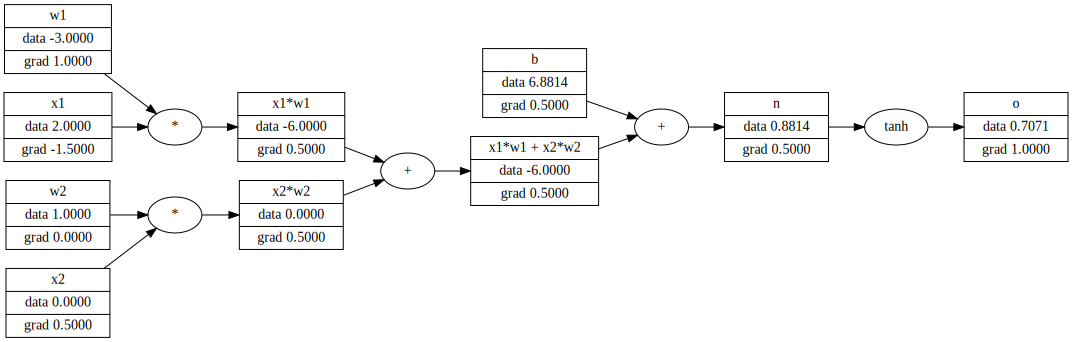

In [2]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value(6.8813735870195432, label='b')
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'

n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label='o'

o.backward()
draw_dot(o)

### 1. Build a Simple Multi Layer Perceptron

In [3]:
class Neuron:
    def __init__(self, nin):
        self.w = [Value(np.random.uniform(-1, 1)) for _ in range(nin)]
        self.b = Value(np.random.uniform(-1, 1))

    def __call__(self, x):
        # w * x + b
        act = sum((wi * xi for wi, xi in zip(self.w, x)), self.b)
        out = act.tanh()
        return out

    def parameters(self):
        return self.w + [self.b]

class Layer:
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs

    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]

class MLP:
    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x
    
    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]


In [18]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])      
n(x)

Value(data=-0.44, grad=0.00)

In [19]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets

In [23]:
# Gradient descent
learning_rate = 0.1

for k in range(20):
    # forward pass
    ypred = [n(x) for x in xs]
    loss = sum((yout-ygt)**2 for ygt, yout in zip(ys, ypred))

    # backward pass
    for p in n.parameters():
        # This is very important: otherwise the grad accumulation will make
        # the historical affect
        p.grad = 0.0
    loss.backward()
    
    # updated
    for p in n.parameters():
        p.data -= learning_rate * p.grad

    print(k, loss.data)

0 0.0406345201123065
1 0.03582552378006793
2 0.0319989768208966
3 0.02888491047844311
4 0.026303493698000613
5 0.024130406392534737
6 0.022277013648378703
7 0.020678456904681272
8 0.01928620746543682
9 0.018063248377181235
10 0.016980863747241125
11 0.016016443601093736
12 0.015151948805643457
13 0.014372815884926265
14 0.013667161588030014
15 0.013025195818675065
16 0.01243878201658101
17 0.0119011035913206
18 0.011406407765526122
19 0.010949806686412315


In [24]:
ypred

[Value(data=0.96, grad=-0.09),
 Value(data=-0.96, grad=0.07),
 Value(data=-0.94, grad=0.12),
 Value(data=0.94, grad=-0.13)]